### DATA UNDERSTANDING

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab as pl

In [38]:
df = pd.read_csv('Car Popularity Predictions.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

Display category and numerical variables

In [40]:
cat_col = list(df.dtypes[df.dtypes == 'object'].index)
num_col = list(df.dtypes[df.dtypes != 'object'].index)
print(cat_col)
print(num_col)

['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style']
['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']


### DATA PREPARATION

### Data Cleaning

#### Handling missing values

Check data with missing values

In [41]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

Drop rows containing missing values

In [42]:
df = df.dropna()
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

#### Handing Outliers

Check variables containing outliers

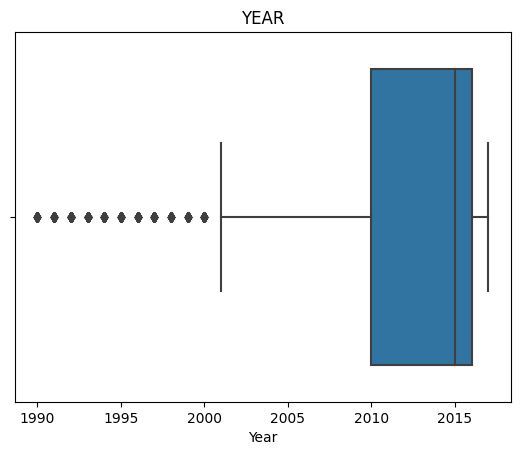

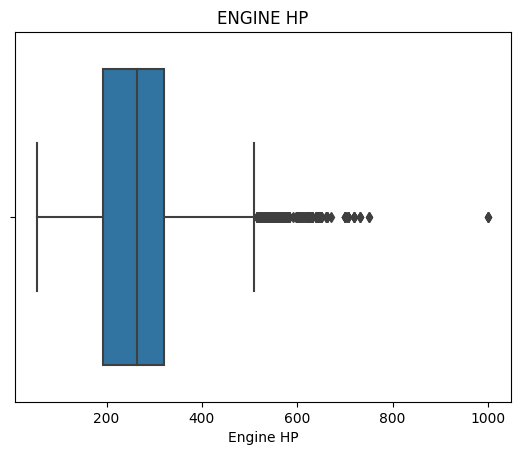

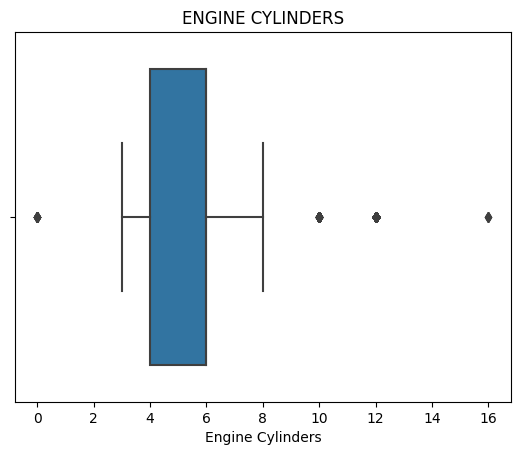

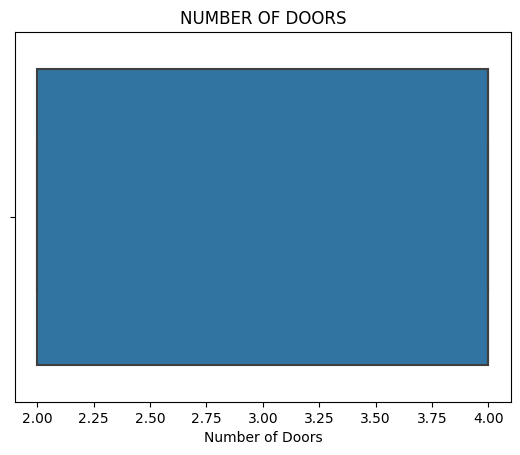

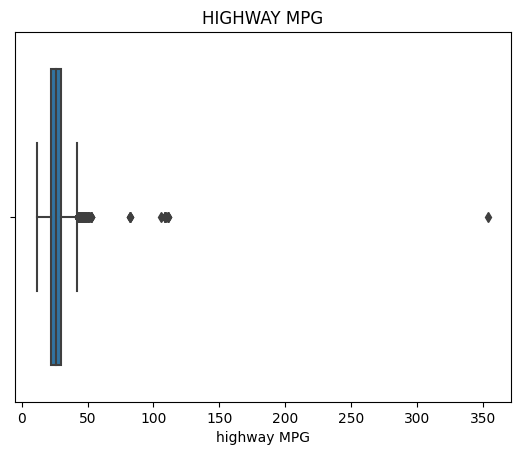

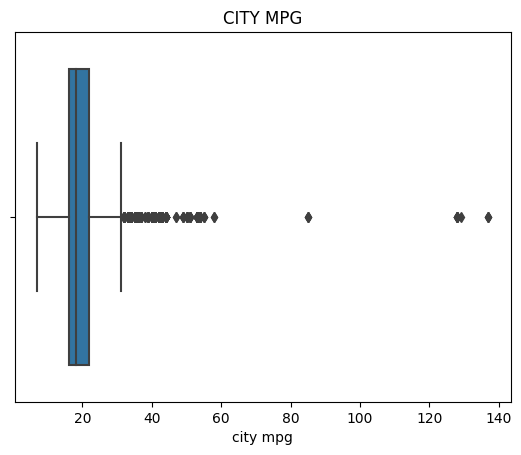

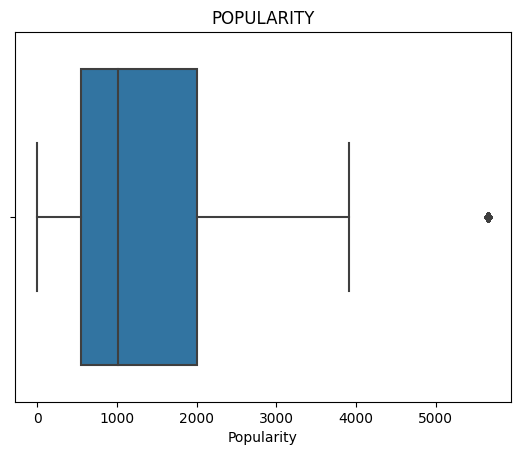

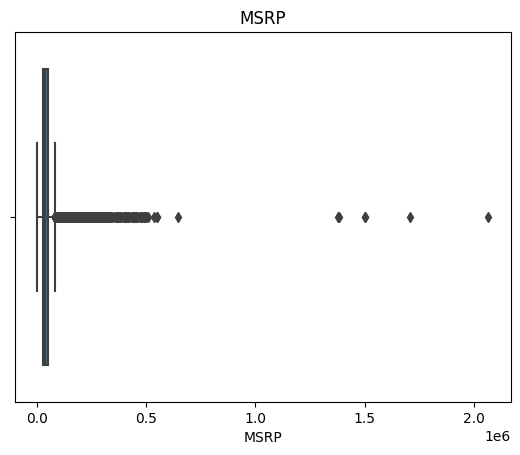

In [43]:
df[num_col] = df[num_col].astype(float)
df.dtypes

for col in num_col:
    sns.boxplot(x=df[col])
    plt.title(str.upper(col))
    plt.show()
    print('\n')

Storing variables containing outliers

In [44]:
outliers = ['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']

Function to remove outliers using IQR

In [45]:
def remove_outliers(data, col):
    Q1 = np.percentile(data[col], 25)
    Q3 = np.percentile(data[col], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

Remove outliers

In [46]:
for col in outliers:
    df = remove_outliers(df, col)

Visualize the result

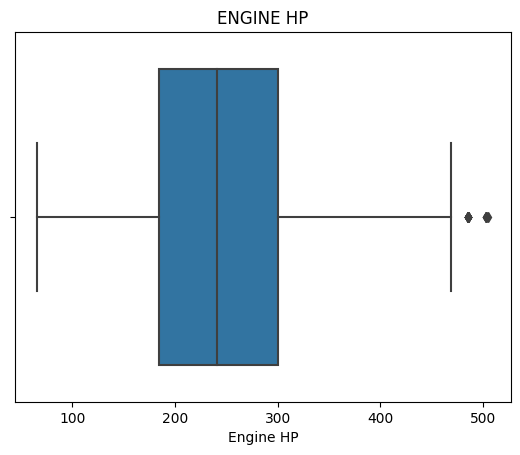

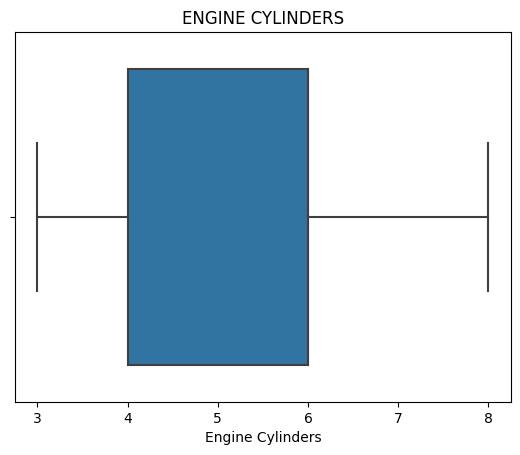

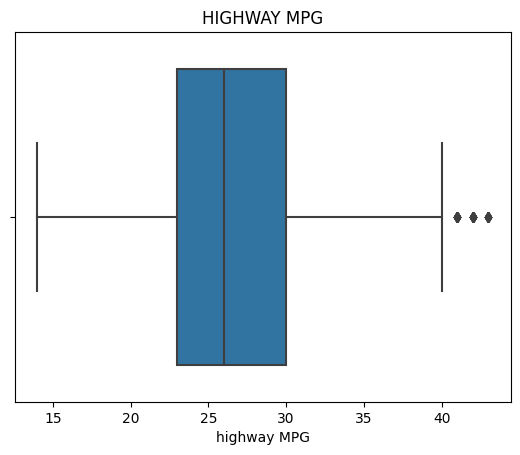

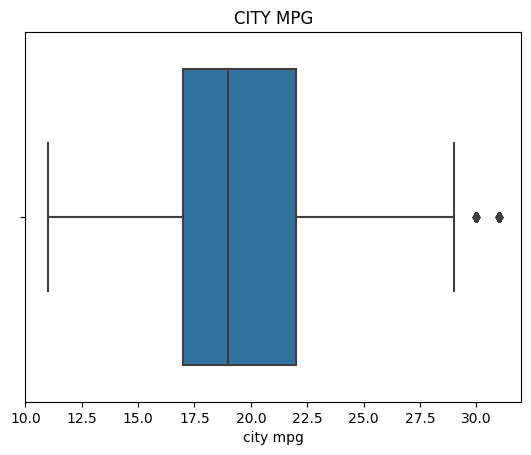

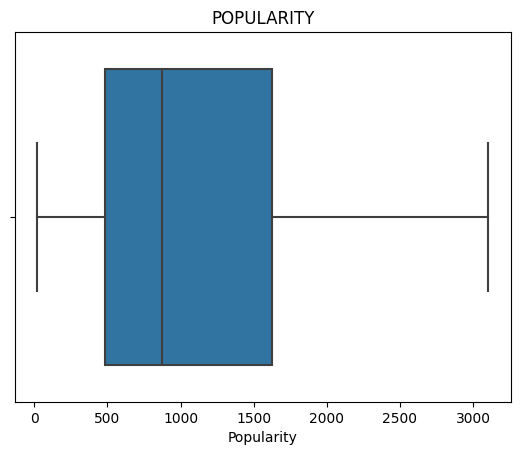

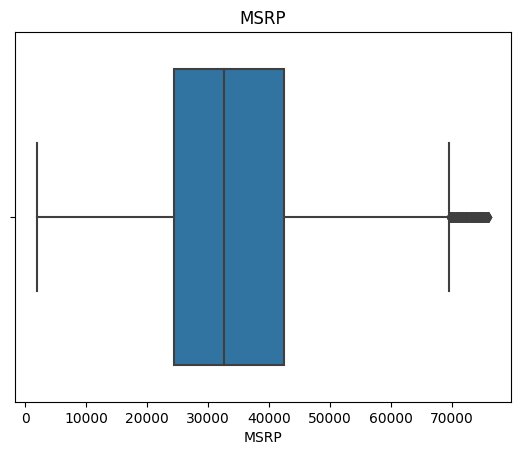

In [47]:
for col in outliers:
    sns.boxplot(x=df[col])
    plt.title(str.upper(col))
    plt.show()

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6152 entries, 17 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               6152 non-null   object 
 1   Model              6152 non-null   object 
 2   Year               6152 non-null   float64
 3   Engine Fuel Type   6152 non-null   object 
 4   Engine HP          6152 non-null   float64
 5   Engine Cylinders   6152 non-null   float64
 6   Transmission Type  6152 non-null   object 
 7   Driven_Wheels      6152 non-null   object 
 8   Number of Doors    6152 non-null   float64
 9   Market Category    6152 non-null   object 
 10  Vehicle Size       6152 non-null   object 
 11  Vehicle Style      6152 non-null   object 
 12  highway MPG        6152 non-null   float64
 13  city mpg           6152 non-null   float64
 14  Popularity         6152 non-null   float64
 15  MSRP               6152 non-null   float64
dtypes: float64(8), object(

#### Encoding

In [49]:
cat_cols = ['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels',
            'Market Category', 'Vehicle Size', 'Vehicle Style']

In [50]:
label_encoders = {}

In [52]:
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [53]:
joblib.dump(label_encoders, 'label_encoders.pkl')

['label_encoders.pkl']

In [54]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
17,2,0,1992.0,6,172.0,6.0,2,2,4.0,46,2,14,24.0,17.0,3105.0,2000.0
18,2,0,1992.0,6,172.0,6.0,2,2,4.0,46,2,14,24.0,17.0,3105.0,2000.0
19,2,0,1992.0,6,172.0,6.0,1,0,4.0,46,2,15,20.0,16.0,3105.0,2000.0
20,2,0,1992.0,6,172.0,6.0,2,2,4.0,46,2,14,24.0,17.0,3105.0,2000.0
21,2,0,1992.0,6,172.0,6.0,2,0,4.0,46,2,14,21.0,16.0,3105.0,2000.0


### DATA MODELING

Import libraries

In [55]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

Define features and target variables

In [56]:
features = ['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP', 'Engine Cylinders', 'Transmission Type',
            'Driven_Wheels', 'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style', 'highway MPG',
            'city mpg', 'Popularity']
target = 'MSRP'

Split dataset into training and testing data

In [57]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

Initialize the Decision Tree Regressor model

In [58]:
model = DecisionTreeRegressor()

Train the model

In [59]:
model.fit(X_train, y_train)

DecisionTreeRegressor()

Make predictions on the test data

In [60]:
y_pred = model.predict(X_test)
print('Data:\n', X_test[:10], '\nPrediction:\n\n', y_pred[:10])

Data:
        Make  Model    Year  Engine Fuel Type  Engine HP  Engine Cylinders  \
5687     17    217  2017.0                 5      301.0               8.0   
11871     9    497  2016.0                 4      420.0               8.0   
10359     9    452  2017.0                 6      182.0               4.0   
9370      9    421  2016.0                 3      285.0               6.0   
9726     13    429  2015.0                 6      245.0               4.0   
2184      5    106  2016.0                 4      275.0               4.0   
3507      7    137  1991.0                 6      152.0               4.0   
11084     5    471  2007.0                 6      240.0               6.0   
7519     24    335  2015.0                 6      260.0               6.0   
817      29     34  2012.0                 4      220.0               4.0   

       Transmission Type  Driven_Wheels  Number of Doors  Market Category  \
5687                   1              1              4.0            

### MODEL EVALUATION

Import libraries

In [61]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

Evaluate the model using R-squared Score

In [62]:
r2 = r2_score(y_test, y_pred)
print('R-squared Score:', r2)

R-squared Score: 0.9368005491749147


The R-squared Score value of 0.9313598053940578 indicates that approximately 93.14% of the variation in the target variable can be explained by the model. A higher R-squared value indicates that the model is better at explaining the variability in the data. In this context, the R-squared value suggests that the model has a very good ability to explain the variability in the data.

Evaluate the model using Mean Squared Error (MSE)

In [63]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print('Mean Absolute Percentage Error (MAPE):', mape)

Mean Absolute Percentage Error (MAPE): 0.08162998883216144


The Mean Absolute Percentage Error (MAPE) value of 0.09109862380663455 indicates that, on average, the model's predictions have a percentage error of approximately 9.11%. A lower MAPE value indicates better accuracy, as it means the model's predictions are closer to the actual values. In this context, the MAPE value suggests reasonably good performance.

### DEPLOYMENT

Import joblib library and save model into a pkl file

In [64]:
import joblib

joblib.dump(model, 'decisiontree_model_CarMRSP.pkl')

['decisiontree_model_CarMRSP.pkl']

Load model from the file

In [65]:
# loaded_model = joblib.load('decisiontree_model_CarMRSP.pkl')

New data to be predicted

In [26]:
# new_data = pd.DataFrame({
#     'Make': [13, 7, 3],
#     'Model': [217, 137, 417],
#     'Year': [2018.0, 2019.0, 2017.0],
#     'Engine Fuel Type': [3, 4, 5],
#     'Engine HP': [182.0, 152.0, 420.0],
#     'Engine Cylinders': [4.0, 4.0, 6.0],
#     'Transmission Type': [1, 2, 2],
#     'Driven_Wheels': [1, 2, 3],
#     'Number of Doors': [4.0, 4.0, 4.0],
#     'Market Category': [28, 43, 46],
#     'Vehicle Size': [0, 1, 2],
#     'Vehicle Style': [13, 14, 15],
#     'highway MPG': [21, 22, 24],
#     'city mpg': [16, 17, 18],
#     'Popularity': [1390, 1391, 1392]
# })

Predict the MSRP of the new data

In [27]:
# predictions = loaded_model.predict(new_data)

Display the predictions

In [28]:
# print('Prediction:', predictions)

Prediction: [21770.         29383.33333333 72500.        ]


In [34]:
# df['Make'].max()

35